# HSE 2021: Mathematical Methods for Data Analysis

## Homework 2

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.datasets import load_boston

%matplotlib inline

sns.set(style="darkgrid")

### Data

For this homework we use Boston Dataset from sklearn (based on UCI ML housing dataset).

In [204]:
data = load_boston() # load dataset

X = data.data
y = data.target
columns = data.feature_names

## Linear regression

#### 1. [0.5 points] 
Create Pandas DataFrame and split the data into train and test sets with ratio 80:20 with random_state=0.

In [49]:
from sklearn.model_selection import train_test_split
boston = pd.DataFrame(X, columns=columns)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

---
#### 2. [1 point] 
Train models on train data using StatsModels( or sckit-learn) library and apply it to the test set; use $RMSE$ and $R^2$ as the quality measure.

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.01$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.01$

Don't forget to scale the data before training the models with StandardScaler!

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

X_train_scaled = sm.add_constant(X_train_scaled)
model = sm.OLS(Y_train, X_train_scaled)
results = model.fit()

X_test_scaled = sm.add_constant(X_test_scaled)
y_test_predict = results.predict(X_test_scaled)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("Linear Regression")
print("______________________________________\n")
print("The model performance for testing set")
print("--------------------------------------")
print("RMSE = %.4f" % rmse)
print("R2 score = %.4f" % r2)

Linear Regression
______________________________________

The model performance for testing set
--------------------------------------
RMSE = 5.7835
R2 score = 0.5892


In [60]:
from sklearn.linear_model import Ridge

model = sm.OLS(Y_train, X_train_scaled)
ridge_results = model.fit_regularized(alpha=0.01, L1_wt=0)

print("Ridge")
print("______________________________________\n")

y_test_predict = ridge_results.predict(X_test_scaled)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print("RMSE = %.4f" % rmse)
print("R2 score = %.4f" % r2)

Ridge
______________________________________

The model performance for testing set
--------------------------------------
RMSE = 5.8270
R2 score = 0.5830


In [61]:
from sklearn.linear_model import Lasso

model = sm.OLS(Y_train, X_train_scaled)
lasso_results = model.fit_regularized(alpha=0.01, L1_wt=1)

print("Lasso")
print("______________________________________\n")

y_test_predict = lasso_results.predict(X_test_scaled)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print("RMSE is = %.4f" % rmse)
print("R2 score is = %.4f" % r2)

Lasso
______________________________________

The model performance for testing set
--------------------------------------
RMSE is = 5.7962
R2 score is = 0.5874


---
#### 3. [1 point] 
Explore the values of the parameters of the resulting models and compare the number of zero weights in them. 

Comment on the significance of the coefficients, overal model significance and other related factors from the results table. 

`Hint` Use StatModels to obtain significance of the coefficients. They ca be found on the `summary` of the fitted linear model. 
It might be tricky to obtain `summary` for the regularized model. Please, read the documentation of the StatModels library to figure out how to do that, e.g.   [OLSResults](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults) class might be useful here.

In [62]:
print(results.params)
print(ridge_results.params)
print(lasso_results.params)

[22.61188119 -0.97082019  1.05714873  0.03831099  0.59450642 -1.8551476
  2.57321942 -0.08761547 -2.88094259  2.11224542 -1.87533131 -2.29276735
  0.71817947 -3.59245482]
[22.38800118 -0.9389153   0.9964658  -0.05759679  0.60978151 -1.72221088
  2.61200412 -0.11553458 -2.75390827  1.83481449 -1.6264754  -2.25612295
  0.71882981 -3.52865629]
[22.60188119 -0.94032071  1.02149689  0.          0.59478962 -1.80291733
  2.58516537 -0.06898551 -2.80847418  1.95673449 -1.73917996 -2.27880622
  0.70557048 -3.59691505]


Видно, что у всех 3 методов обучения (то есть методов fit) веса регрессеров достаточно похожи между собой. Также видно, что нулевое значение имеет только третий параметр в Lasso, кроме того, близкие к нулю значения имеют параметры 3 и 7 для всех моделей. Так как перед началом обучения мы все данные масштабировали, то это скорее всего связано с незначимостью данных регрессеров.

---
#### 4. [1 point] 
Implement one of the elimination algorithms that were described in the Seminar_4 (Elimination by P-value, Forward elimination, Backward elimination), make conclusions. 
It's enough to apply to one of the models above (e.g simple linear regression)

In [208]:
import statsmodels.api as sm

scaler = StandardScaler()
X = data.data
X_scaled = scaler.fit_transform(X)
X_scaled = sm.add_constant(X_scaled)

def backward_elimination(X, y, significance_level=0.05):

    while(True):
        regressor = sm.OLS(y, X).fit()
        index = np.argmax(regressor.pvalues)
        max_p_value = regressor.pvalues[index]
        if max_p_value > significance_level:
            X = np.delete(X, index, axis=1)
        else:
            print(regressor.summary2())
            return X
        
print(backward_elimination(X_scaled, y))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.735    
Dependent Variable: y                AIC:                3021.7264
Date:               2021-10-12 02:58 BIC:                3072.4448
No. Observations:   506              Log-Likelihood:     -1498.9  
Df Model:           11               F-statistic:        128.2    
Df Residuals:       494              Prob (F-statistic): 5.54e-137
R-squared:          0.741            Scale:              22.432   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     22.5328     0.2106   107.0181   0.0000   22.1191   22.9465
x1        -0.9316     0.2817    -3.3074   0.0010   -1.4850   -0.3782
x2         1.0682     0.3151     3.3902   0.0008    0.4491    1.6872
x3         0.6899     0.2168     3.1826   0.0016    0.2640    1.1157

Из полученного summary мы видим, что осталось всего 11 регрессов из начальных 13, а значит, есть 2 регрессора незначимых, которые можно удалить

---
#### 5. [1 point] 
Find the best (in terms of RMSE) $\alpha$ for Ridge regression using cross-validation with 5 folds. You must select values from range $[10^{-4}, 10^{3}]$.

In [98]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-4, 3, 100)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring = "neg_root_mean_squared_error")
searcher.fit(X_train_scaled, Y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

Best alpha = 7.5646


---
## Gradient descent

#### 6. [3.5 points] 
**Implement a linear regression model for the MSE loss function, trained by gradient descent.**

All calculations must be vectorized, and python loops can only be used for gradient descent iterations. As a stop criterion, you must use (simultaneously):

* checking for the Euclidean norm of the weight difference on two adjacent iterations (for example, less than some small number of the order of $10^{-6}$, set by the `tolerance` parameter);
* reaching the maximum number of iterations (for example, 10000, set by the `max_iter` parameter).

You need to implement:

* Full gradient descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Stochastic Gradient Descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is the estimate of the gradient over the batch of objects selected randomly.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} q_{i_{k}} (w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

Exponentially weighed averages can provide a better estimate which is closer to the actual gradient.


To make sure that the optimization process really converges, we will use the `loss_history` class attribute. After calling the `fit` method, it should contain the values of the loss function for all iterations, starting from the first one (before the first step on the anti-gradient).

You need to initialize the weights with a zero or random (from a normal distribution) vector. The following is a template class that needs to contain the code implementing all variations of the models.

In [166]:
from sklearn.base import BaseEstimator

class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum', 
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum'
        delta: float
            proportion of object in a batch (fot stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        """
        
        self.gd_type = gd_type
        self.delta = delta
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        if w0 is None:
            self.w0 = np.zeros(X.shape[1]+1)
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        
        self.loss_history = []
        self.w = self.w0
        h = 0
        
        for step in range(self.max_iter):
            
            if self.gd_type == 'GradientDescent':
                w_curr = self.w - self.eta * self.calc_gradient(X, y)
            
            elif self.gd_type == 'StochasticDescent':
                indices = np.random.randint(0, high=y.shape[0]-1, size=int(self.delta*size))
                X_ind = np.take(X, indices, axis=0)
                y_ind = np.take(y, indices)
                w_curr = self.w - self.eta * self.calc_gradient(X_ind, y_ind)
                
            elif self.gd_type == 'Momentum':
                h = self.alpha * h + self.eta * self.calc_gradient(X, y)
                w_curr = self.w - h
                
            else:
                raise Exception('Unsupported type')
            
            if (np.linalg.norm(w_curr - self.w) < self.tolerance):
                break
                
            self.w = w_curr
            self.loss_history.append(self.calc_loss(X, y))
   
        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        
        return np.dot(X, self.w)
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        
        l = X.shape[0]
        return (2/l) * np.dot(X.T, (np.dot(X, self.w) - y))

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        return (((self.predict(X) - y) ** 2).mean())

#### 7. [1 points] 
Train and validate "hand-written" model (simple linear regression) on the same data, and compare the quality with the Sklearn or StatsModels methods. Investigate the effect of the `max_iter` and `alpha` parameters on the optimization process. Is it consistent with your expectations?

In [170]:
w0 = np.random.rand(X_train_scaled[0].size)
gd = LinReg(gd_type='GradientDescent', w0 = w0, max_iter = 1000)
gd.fit(X_train_scaled, Y_train)

sgd = LinReg(gd_type='StochasticDescent', w0 = w0,  max_iter = 1000)
sgd.fit(X_train_scaled, Y_train)

momentum=LinReg(gd_type='Momentum', w0 = w0, alpha = 0.5,  max_iter = 1000)
momentum.fit(X_train_scaled, Y_train)

momentumSmall=LinReg(gd_type='Momentum', w0 = w0, alpha = 0.9,  max_iter = 100)
momentumSmall.fit(X_train_scaled, Y_train)

momentumBig=LinReg(gd_type='Momentum', w0 = w0, alpha = 0.1,  max_iter = 100)
momentumBig.fit(X_train_scaled, Y_train)

rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("1000 iterations")
print("\n")
print("Linear Regression")
print("--------------------------------------")
print("RMSE = %.4f" % rmse)
print("R2 score = %.4f" % r2)

print("\n")
print("Gradient Descent")
rmse = (np.sqrt(mean_squared_error(Y_test, gd.predict(X_test_scaled))))
r2 = r2_score(Y_test, gd.predict(X_test_scaled))
print("--------------------------------------")
print("RMSE = %.4f" % rmse)
print("R2 score = %.4f" % r2)

print("\n")
print("Stochastic Gradient Descent")
rmse = (np.sqrt(mean_squared_error(Y_test, sgd.predict(X_test_scaled))))
r2 = r2_score(Y_test, sgd.predict(X_test_scaled))
print("--------------------------------------")
print("RMSE = %.4f" % rmse)
print("R2 score = %.4f" % r2)

print("\n")
print("Momentum")
rmse = (np.sqrt(mean_squared_error(Y_test, momentum.predict(X_test_scaled))))
r2 = r2_score(Y_test, momentum.predict(X_test_scaled))
print("--------------------------------------")
print("RMSE = %.4f" % rmse)
print("R2 score = %.4f" % r2)

print("\n")
print("Momentum small alpha")
rmse = (np.sqrt(mean_squared_error(Y_test, momentumSmall.predict(X_test_scaled))))
r2 = r2_score(Y_test, momentumSmall.predict(X_test_scaled))
print("--------------------------------------")
print("RMSE = %.4f" % rmse)
print("R2 score = %.4f" % r2)

print("\n")
print("Momentum big alpha")
rmse = (np.sqrt(mean_squared_error(Y_test, momentumBig.predict(X_test_scaled))))
r2 = r2_score(Y_test, momentumBig.predict(X_test_scaled))
print("--------------------------------------")
print("RMSE = %.4f" % rmse)
print("R2 score = %.4f" % r2)

1000 iterations


Linear Regression
--------------------------------------
RMSE = 5.7962
R2 score = 0.5874


Gradient Descent
--------------------------------------
RMSE = 5.8222
R2 score = 0.5837


Stochastic Gradient Descent
--------------------------------------
RMSE = 5.8374
R2 score = 0.5815


Momentum
--------------------------------------
RMSE = 5.7915
R2 score = 0.5881


Momentum small alpha
--------------------------------------
RMSE = 5.8190
R2 score = 0.5842


Momentum big alpha
--------------------------------------
RMSE = 6.8459
R2 score = 0.4244


In [168]:
w0 = np.random.rand(X_train_scaled[0].size)
gd = LinReg(gd_type='GradientDescent', w0 = w0, max_iter = 100)
gd.fit(X_train_scaled, Y_train)

sgd = LinReg(gd_type='StochasticDescent', w0 = w0,  max_iter = 100)
sgd.fit(X_train_scaled, Y_train)

momentum=LinReg(gd_type='Momentum', w0 = w0, alpha = 0.5,  max_iter = 100)
momentum.fit(X_train_scaled, Y_train)

momentumSmall=LinReg(gd_type='Momentum', w0 = w0, alpha = 0.9,  max_iter = 100)
momentumSmall.fit(X_train_scaled, Y_train)

momentumBig=LinReg(gd_type='Momentum', w0 = w0, alpha = 0.1,  max_iter = 100)
momentumBig.fit(X_train_scaled, Y_train)


rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)


print("100 iterations")
print("\n")
print("Linear Regression")
print("--------------------------------------")
print("RMSE = %.4f" % rmse)
print("R2 score = %.4f" % r2)

print("\n")
print("Gradient Descent")
rmse = (np.sqrt(mean_squared_error(Y_test, gd.predict(X_test_scaled))))
r2 = r2_score(Y_test, gd.predict(X_test_scaled))
print("--------------------------------------")
print("RMSE = %.4f" % rmse)
print("R2 score = %.4f" % r2)

print("\n")
print("Stochastic Gradient Descent")
rmse = (np.sqrt(mean_squared_error(Y_test, sgd.predict(X_test_scaled))))
r2 = r2_score(Y_test, sgd.predict(X_test_scaled))
print("--------------------------------------")
print("RMSE = %.4f" % rmse)
print("R2 score = %.4f" % r2)

print("\n")
print("Momentum")
rmse = (np.sqrt(mean_squared_error(Y_test, momentum.predict(X_test_scaled))))
r2 = r2_score(Y_test, momentum.predict(X_test_scaled))
print("--------------------------------------")
print("RMSE = %.4f" % rmse)
print("R2 score = %.4f" % r2)

print("\n")
print("Momentum small alpha")
rmse = (np.sqrt(mean_squared_error(Y_test, momentumSmall.predict(X_test_scaled))))
r2 = r2_score(Y_test, momentumSmall.predict(X_test_scaled))
print("--------------------------------------")
print("RMSE = %.4f" % rmse)
print("R2 score = %.4f" % r2)

print("\n")
print("Momentum big alpha")
rmse = (np.sqrt(mean_squared_error(Y_test, momentumBig.predict(X_test_scaled))))
r2 = r2_score(Y_test, momentumBig.predict(X_test_scaled))
print("--------------------------------------")
print("RMSE = %.4f" % rmse)
print("R2 score = %.4f" % r2)

100 iterations


Linear Regression
--------------------------------------
RMSE = 5.7962
R2 score = 0.5874


Gradient Descent
--------------------------------------
RMSE = 7.0527
R2 score = 0.3891


Stochastic Gradient Descent
--------------------------------------
RMSE = 7.0386
R2 score = 0.3916


Momentum
--------------------------------------
RMSE = 6.0796
R2 score = 0.5461


Momentum small alpha
--------------------------------------
RMSE = 5.8188
R2 score = 0.5842


Momentum big alpha
--------------------------------------
RMSE = 6.7562
R2 score = 0.4394


Если мы возьмем небольшое значение max_iter(=100), то, как и ожидалось, встроенный метод даёт лучшие результаты. RMSE  = 5.7962 vs RMSE = 7.***
<br>
Также, согласно ожиданиям, из реализованных методов лучше всех работает Momentum, так как является оптимизацией градиентного спуска (использует "инерцию" движения), а худшие показатели у Stochastic Gradient Descent, поскольку на каждой итерации оценка по одному объекту, поэтому этот результат тоже ожидаем
<br>
Но что примечательно: при большом значении max_iter(=1000) и средней alpha (=0.5) встроенный метод показал качество хуже, чем реализованный самостоятельно Momentum! Кроме того, показатели у всех методов улучшились и по качеству стали сравнимы с встроенным методом
<br>
Также можно сравнить качества Momentum в зависимости от alpha: при небольшом значении max_iter(=100), лучшее качество показывает наименьший alpha (=0.1) и даёт результат, сопоставимый с результатами встроенного метода
<br>
При большом значении max_iter(=1000) лучшее качество (превосходящее даже встроенный метод) у среднего alpha(=0.5)

#### 8. [1 points] 
Plot graphs (on the same picture) of the dependence of the loss function value on the iteration number for Full GD, SGD and Momentum. Draw conclusions about the rate of convergence of various modifications of gradient descent.

Don't forget about what *beautiful* graphics should look like!

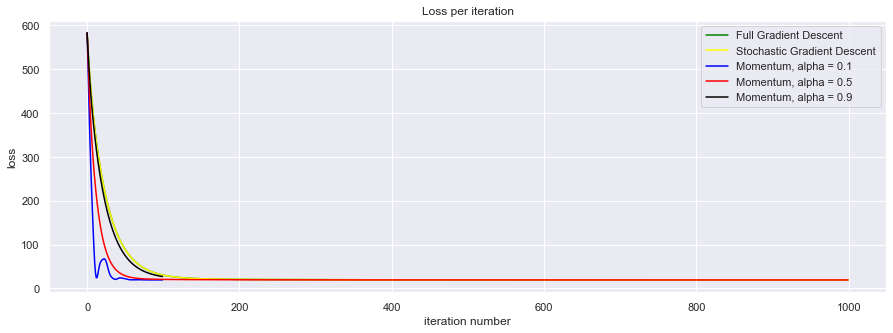

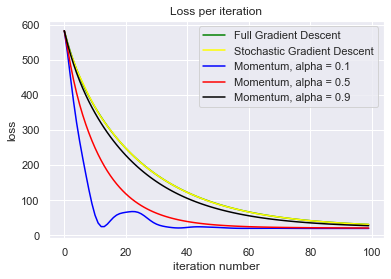

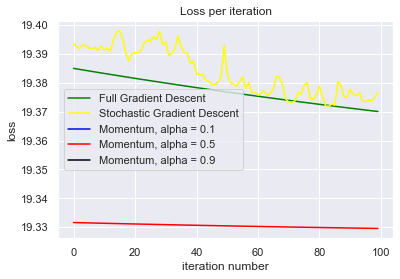

In [173]:
plt.figure(figsize=(15,5))

plt.plot(gd.loss_history, label = 'Full Gradient Descent', color = 'green')
plt.plot(sgd.loss_history, label = 'Stochastic Gradient Descent', color = 'yellow')
plt.plot(momentumSmall.loss_history, label = 'Momentum, alpha = 0.1', color = 'blue')
plt.plot(momentum.loss_history, label = 'Momentum, alpha = 0.5', color = 'red')
plt.plot(momentumBig.loss_history, label = 'Momentum, alpha = 0.9', color = 'black')
plt.title("Loss per iteration")
plt.xlabel("iteration number")
plt.ylabel("loss")
plt.legend()
plt.show()


plt.plot(gd.loss_history[:100], label = 'Full Gradient Descent', color = 'green')
plt.plot(sgd.loss_history[:100], label = 'Stochastic Gradient Descent', color = 'yellow')
plt.plot(momentumSmall.loss_history[:100], label = 'Momentum, alpha = 0.1', color = 'blue')
plt.plot(momentum.loss_history[:100], label = 'Momentum, alpha = 0.5', color = 'red')
plt.plot(momentumBig.loss_history[:100], label = 'Momentum, alpha = 0.9', color = 'black')
plt.title("Loss per iteration")
plt.xlabel("iteration number")
plt.ylabel("loss")
plt.legend()
plt.show()


plt.plot(gd.loss_history[900:], label = 'Full Gradient Descent', color = 'green')
plt.plot(sgd.loss_history[900:], label = 'Stochastic Gradient Descent', color = 'yellow')
plt.plot(momentumSmall.loss_history[900:], label = 'Momentum, alpha = 0.1', color = 'blue')
plt.plot(momentum.loss_history[900:], label = 'Momentum, alpha = 0.5', color = 'red')
plt.plot(momentumBig.loss_history[900:], label = 'Momentum, alpha = 0.9', color = 'black')
plt.title("Loss per iteration")
plt.xlabel("iteration number")
plt.ylabel("loss")
plt.legend()
plt.show()

Из 1 графика видно, что функция потерь полного градиентного спуска, стохастического и Momentum с alpha = 0.9 почти не отличаются. При этом наименьшие значения у Momentum с alpha = 0.1. 
<br>
Если посмотреть на первые 100 значений(2 график), то опять же графики полного и стохастического градиентного спусков почти совпадают, но наименьшие значения по-прежнему у Momentum с alpha = 0.1.
<br>
На 3 же графике, то есть последних 100 итерациях, видно, как сильно колеблются значения стохастического спуска (что ожидаемо, так как в конце спуска оценка по одному объекту должна работать плохо, так как оптимумы у всех объектов, если брать их по отдельности, разные), остальные же графики уже являются горизонтальными прямыми (что также ожидаемо, так как изменения в конце уже незначительные)